# CosmicFishPie

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
snscolors = sns.color_palette("colorblind")

from cosmicfishpie.fishermatrix import cosmicfish

# Table of Contents

[Cosmological parameters](#cosmological-parameters)

[Settings](#settings)

[Photometric probe](#photometric-probes)

[Fisher Matrix Photo](#fisher-matrix-photo)

# Cosmological parameters

In [2]:
fiducial = {
    "Omegam": 0.32,
    "Omegab": 0.05,
    "h": 0.67,
    "ns": 0.96,
    "sigma8": 0.815584,
    "w0": -1.0,
    "wa": 0.0,
    "mnu": 0.06,
    "Neff": 3.044,
}


# Settings

In [3]:

options = {
    "accuracy": 1,
    "feedback": 1,
    "code": "camb",
    "specs_dir": "../survey_specifications/",
    "outroot": "photometric-probes",
    "survey_name": "Euclid",
    "survey_name_photo": "Euclid-Photometric-ISTF-Pessimistic",
    "cosmo_model": "w0waCDM",
}

In [4]:
observables = ["GCph", "WL"]

### Pass options and settings to Cosmicfishpie

We set the survey to `Euclid-Photometric-ISTF-Pessimistic` setting the default settings for the galaxy distributions, biases and modeling choices

In [5]:
cosmoFM_A = cosmicfish.FisherMatrix(
    fiducialpars=fiducial,
    options=options,
    observables=observables,
    cosmoModel=options["cosmo_model"],
    surveyName=options["survey_name"],
)

****************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

****************************************************************
 This is the new Python version of the CosmicFish code.
****************************************************************
Using default specifications for spectroscopic: /home/santiago/CosmoProjects/CosmicJellyFish/cosmicfishpie/cosmicfishpie/configs/default_survey_specifications/Euclid-Spectroscopic-ISTF-Pessimistic.yaml

  -> Survey loaded:  Euclid-Spectroscopic-ISTF-Pessimistic
Using default specifications for photo: /home/santiago/CosmoProjects/CosmicJellyFish/cosmicfishpie/cosmicfishpie/configs/default_survey_specifications/Euclid-Photometric-ISTF-Pessimistic.yaml

  -> Survey loaded:  Euclid-Photometric-ISTF-Pessimistic

  -> Computing cosmology at the fiducial point

  ---> Cosm

# Photometric probes

## 3x2pt Angular Power Spectrum Observable

The 3x2pt function is the auto- and cross-correlation of observables X, Y = {L, G},  which can be combined in 3 times the 2pt-function of:
Lensing-Lensing, Galaxy-Lensing and Galaxy-Galaxy

$$
C_{ij}^{XY}(\ell) = \int^{z_{max}}_{z_{min}} \!\!\!\!\! dz  \frac{W_{i}^{X}(z) W_{j}^{Y}(z)}{H(z)r^{2}(z)} P_{\delta \delta} \! \left[ \frac{\ell+1/2}{r(z)},z \right] +N_{ij}^{XY}(\ell)
$$

where the cosmic shear window function is given by:

$$
W_i^{\gamma}(z) = \frac{3}{2} \, H_0^2 \, \Omega_m \,  (1+z) \, r(z) \int_z^{z_{max}}dz^\prime \,
    %\niof(z') 
    n_i(z^\prime)
    \left[1- \frac{r(z)}{r(z^\prime)}\right]~
$$

and the estimated number density of galaxies in each bin is given by:

$$
n_i(z) = \frac{\int_{z_i^-}^{z_i^+} dz_p n(z) p_{ph}(z_p|z)}{\int_{z_{min}}^{z_{max}}dz \int_{z_i^-}^{z_i^+}dz_p n(z) p_{ph}(z_p|z)}~
$$

which is a convolution of the theoretical mean number density with a photometric redshift error distribution:

$$
p_{ph}(z_p|z) = \frac{1-f_{out}}{\sqrt{2\pi}\sigma_b(1+z)} \exp\left\{-\frac{1}{2}\left[\frac{z-c_bz_p-z_b}{\sigma_b(1+z)}\right]^2\right\} \\ + \frac{f_{out}}{\sqrt{2\pi}\sigma_0(1+z)} \exp\left\{-\frac{1}{2}\left[\frac{z-c_0z_p-z_0}{\sigma_0(1+z)}\right]^2\right\}
$$

The full lensing function is given by the addition of cosmic shear and intrinsic alignment, which takes the following form:

$$
W_{i}^{L}(z) = W_{i}^{\gamma}(z) - W_{i}^\mathrm{IA}(z) 
$$

Moreover for IA and for photometric Galaxy clustering, the window function takes the simple form:

$$
W_{i}^\mathrm{IA}(z) = \mathcal{A}_\mathrm{IA} \mathcal{C}_\mathrm{IA}\Omega_{m,0} \frac{\mathcal{F}_\mathrm{IA}(z)}{D(z)} n_i(z) H(z)\\
W_{i}^{G}(z) = n_i(z) H(z)\, b_i(z)
$$

Here, $b_i(z)$ is the galaxy bias (the ratio between the density contrast of galaxies and dark matter).

In [6]:
print(cosmoFM_A.photopars)
print(cosmoFM_A.photobiaspars)
print(cosmoFM_A.IApars)

{'fout': 0.1, 'co': 1, 'cb': 1, 'sigma_o': 0.05, 'sigma_b': 0.05, 'zo': 0.1, 'zb': 0.0}
{'bias_model': 'binned', 'b1': 1.0997727037892875, 'b2': 1.220245876862528, 'b3': 1.2723993083933989, 'b4': 1.316624471897739, 'b5': 1.35812370570578, 'b6': 1.3998214171814918, 'b7': 1.4446452851824907, 'b8': 1.4964959071110084, 'b9': 1.5652475842498528, 'b10': 1.7429859437184225}
{'IA_model': 'eNLA', 'AIA': 1.72, 'betaIA': 2.17, 'etaIA': -0.41}


## Compute the Photometric angular power spectrum $C(\ell)$

In [7]:
from cosmicfishpie.LSSsurvey import photo_obs as phobs

Declare an instance of the class and compute the angular power spectrum

In [8]:
photo_Cls = phobs.ComputeCls(
    cosmoFM_A.fiducialcosmopars, cosmoFM_A.photopars, cosmoFM_A.IApars, cosmoFM_A.photobiaspars
)
phCls_A = photo_Cls.compute_all()

## Extract the window functions from CosmicFishPie

In [9]:
zz = np.linspace(0.001, 2.5, 250)  ## Euclid specs are only defined up to z=3.

In [17]:
photo_Cls.binrange

{'GCph': range(1, 11), 'WL': range(1, 11)}

In [18]:
## Window function class for photometric probes
window = photo_Cls.window

### Plot galaxy number density at each of the bins

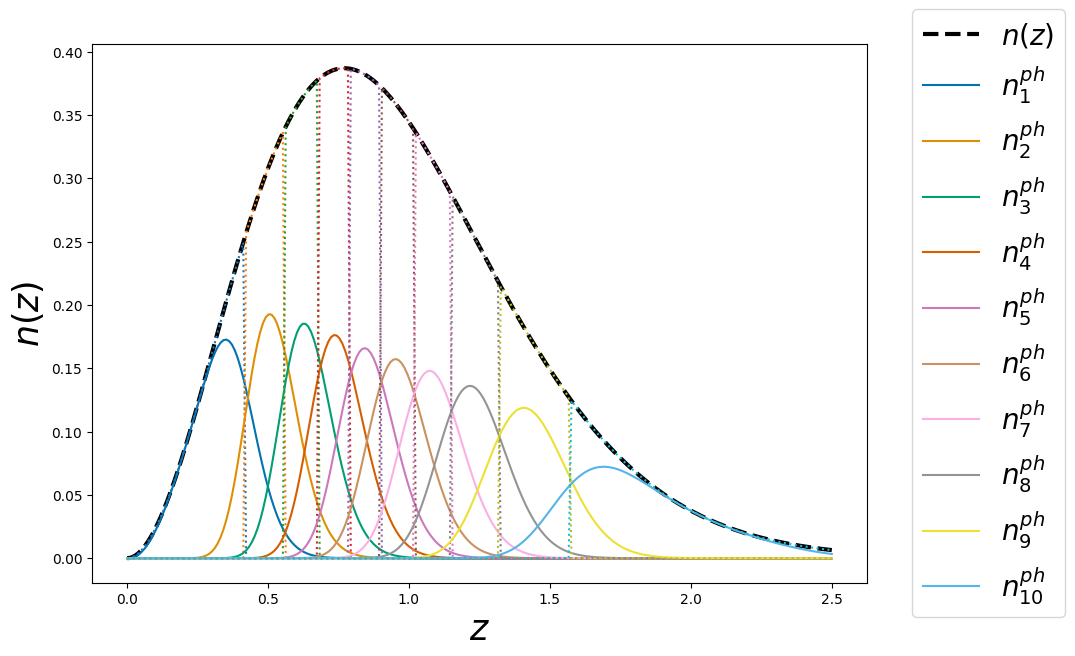

In [ ]:

color = iter(snscolors)
plt.figure(figsize=(10, 7))
plt.plot(zz, window.dNdz(zz), label=r"$n(z)$", color="k", lw=3, ls="--")
for ind in photo_Cls.binrange['WL']:
    c = next(color)
    plt.plot(zz, window.ngal_photoz(zz, ind, obs="WL"), label=r"$n^{ph}_{%i}$" % ind, color=c)
    plt.plot(zz, window.n_i(zz, ind), ls=":")  # label=r'dNi bin-'+str(ind), color=c)
plt.xlabel(r"$z$", fontsize=25)
plt.ylabel(r"$n(z)$", fontsize=25)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=20)

### Plot radial window functions for each of the probes

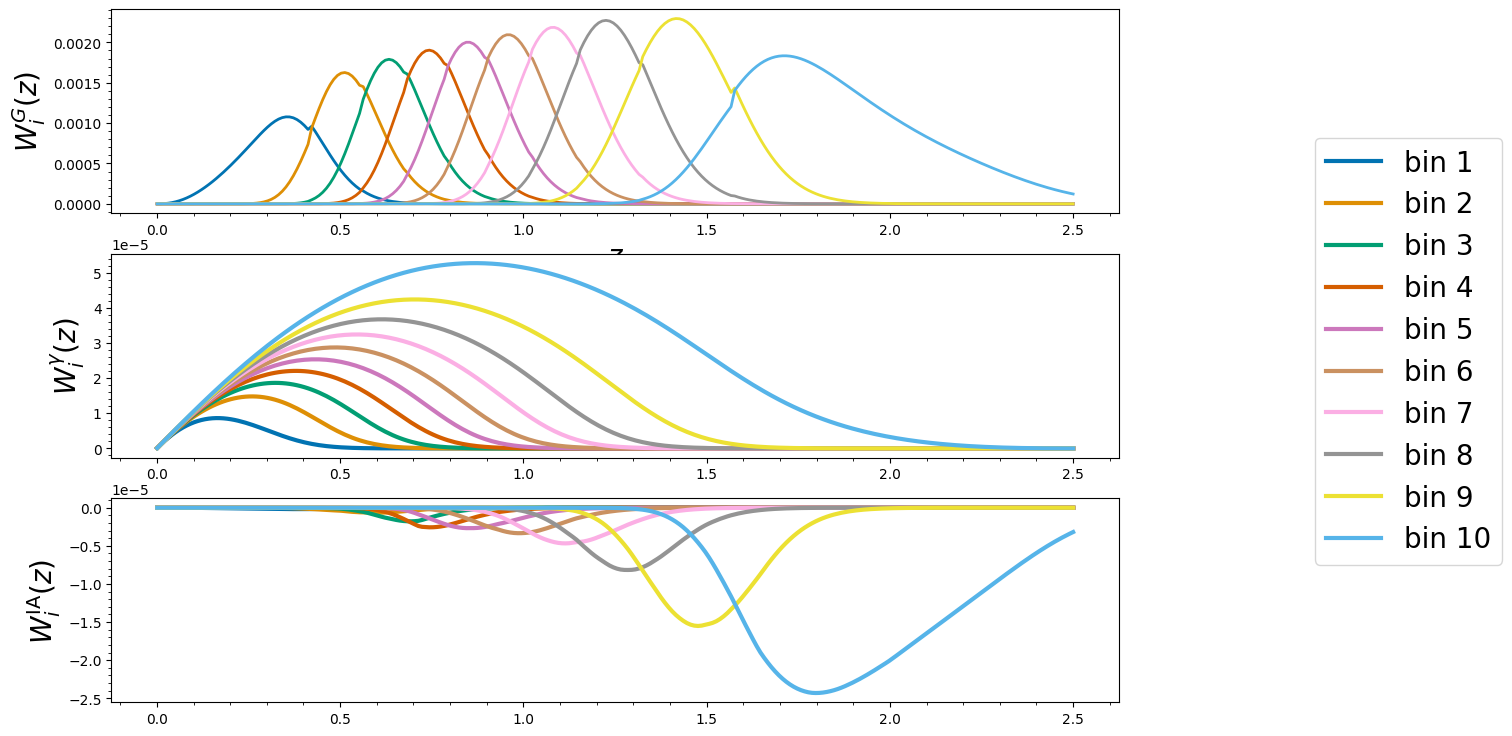

<Figure size 1000x800 with 0 Axes>

In [ ]:

color = iter(snscolors)
fig, axs = plt.subplots(3, 1, figsize=(13, 9))
plt.figure(figsize=(10, 8))
for ind in photo_Cls.binrange['GCph']:
    c = next(color)
    axs[0].plot(zz, photo_Cls.genwindow(zz, "GCph", ind)[0], lw=2.0, color=c)
color = iter(snscolors)
for ind in photo_Cls.binrange['WL']:
    c = next(color)
    axs[1].plot(zz, photo_Cls.genwindow(zz, "WL", ind)[0], lw=3.0, color=c)
    axs[2].plot(zz, photo_Cls.genwindow(zz, "WL", ind)[1], lw=3.0, color=c, label=r"bin %s" % ind)
axs[0].set_xlabel(r"$z$", fontsize=20)

axs[0].set_ylabel(r"$W_i^{G}(z)$", fontsize=20)
axs[1].set_ylabel(r"$W_i^{\gamma}(z)$", fontsize=20)
axs[2].set_ylabel(r"$W_i^\mathrm{IA}(z)$", fontsize=20)
axs[0].minorticks_on()
axs[1].minorticks_on()
axs[2].minorticks_on()
fig.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=20)

## Finally plot the 3x2pt $C^{XY}_{ij}(\ell)$

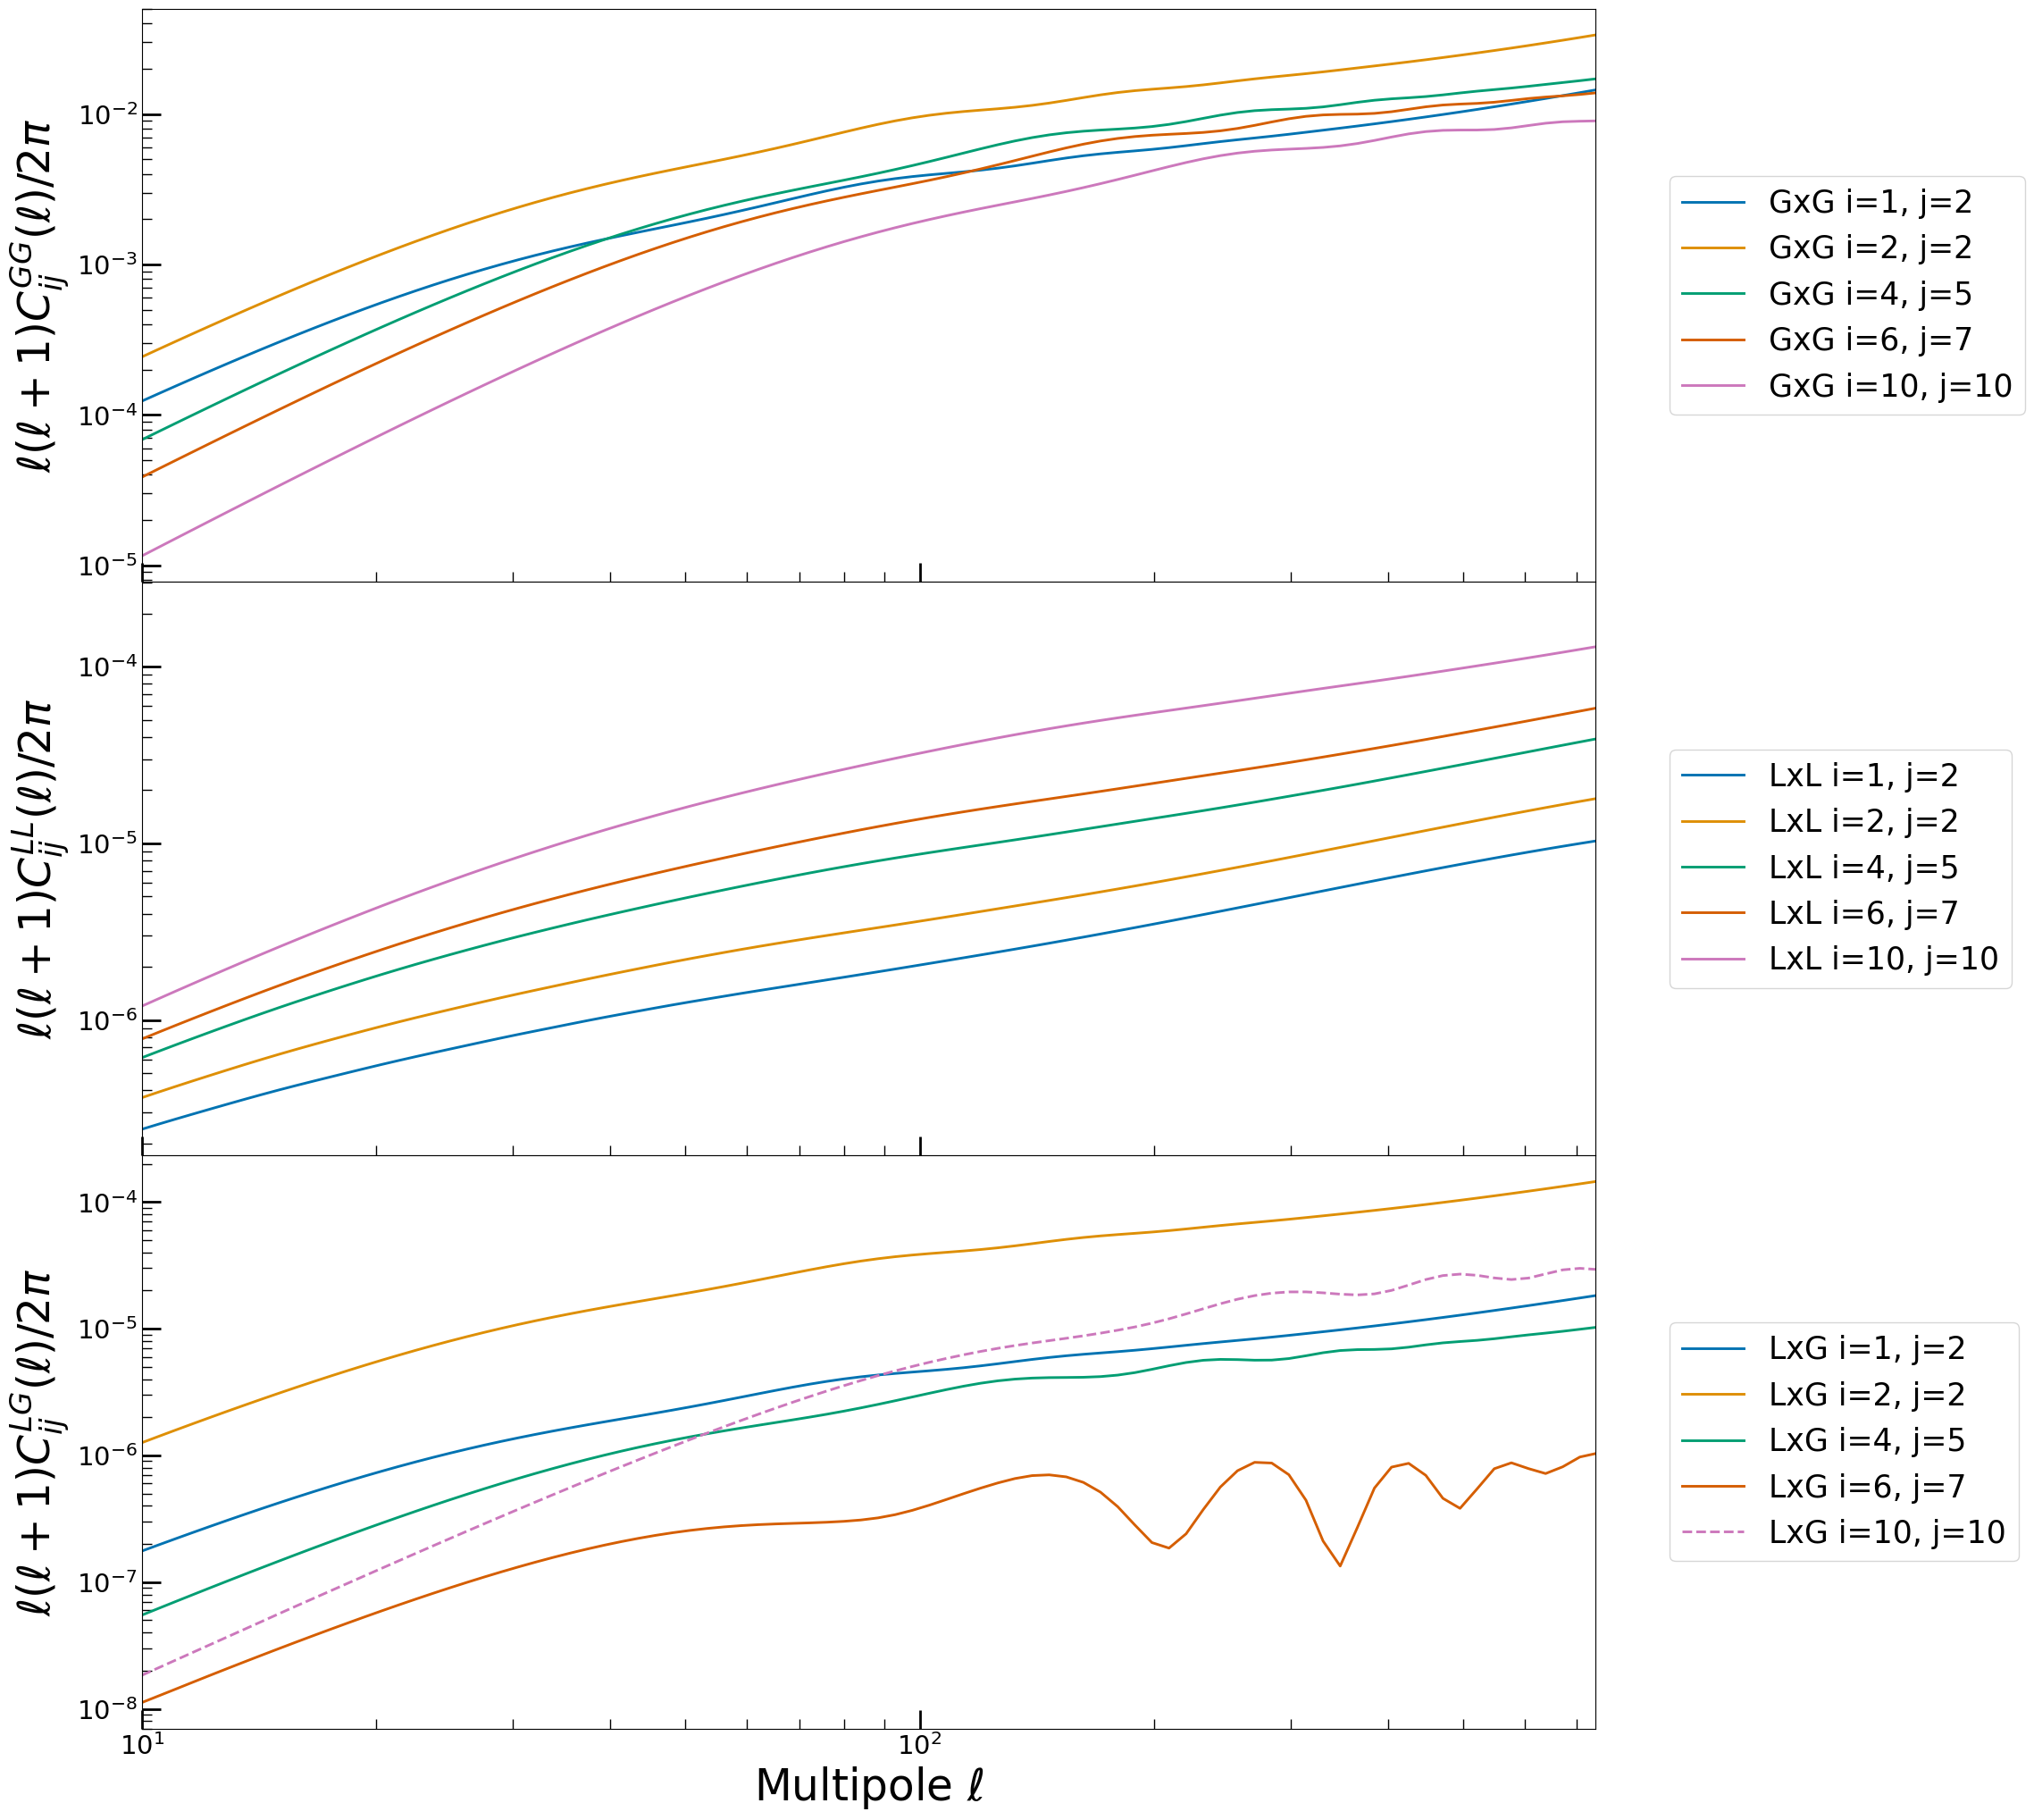

In [19]:
# Accessing LSS cls
cls = photo_Cls.result
ell = cls["ells"]
norm = ell * (ell + 1) / (2 * np.pi)

color = iter(snscolors)
fig, axs = plt.subplots(3, 1, figsize=(21, 25), sharex=True)
for bin1, bin2 in zip([1, 2, 4, 6, 10], [2, 2, 5, 7, 10]):
    c = next(color)
    axs[0].loglog(
        ell,
        norm * cls["GCph " + str(bin1) + "xGCph " + str(bin2)],
        color=c,
        label="GxG i=" + str(bin1) + ", j=" + str(bin2),
        ls="-",
        lw=2.1,
    )
    axs[1].loglog(
        ell,
        norm * cls["WL " + str(bin1) + "xWL " + str(bin2)],
        color=c,
        label="LxL i=" + str(bin1) + ", j=" + str(bin2),
        ls="-",
        lw=2.1,
    )
    corr = norm * cls["WL " + str(bin1) + "xGCph " + str(bin2)]
    if np.mean(corr) < 0:
        ls = "--"
    else:
        ls = "-"
    axs[2].loglog(
        ell, abs(corr), color=c, label="LxG i=" + str(bin1) + ", j=" + str(bin2), ls=ls, lw=2.1
    )
axs[0].set_ylabel(r"$\ell(\ell+1)C_{ij}^{GG}(\ell)/2\pi$", fontsize=35)
axs[0].legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=25)
axs[1].set_ylabel(r"$\ell(\ell+1)C_{ij}^{LL}(\ell)/2\pi$", fontsize=35)
axs[1].legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=25)
axs[2].set_ylabel(r"$\ell(\ell+1)C_{ij}^{LG}(\ell)/2\pi$", fontsize=35)
axs[2].legend(bbox_to_anchor=(1.04, 0.5), loc="center left", fontsize=25)

axs[2].set_xlim(10, 740)
axs[2].set_xlabel(r"Multipole $\ell$", fontsize=35)
fig.subplots_adjust(hspace=0.0)

[ax.tick_params(which="major", length=15, width=2, direction="in") for ax in axs]
[ax.tick_params(which="minor", length=8, width=1, direction="in") for ax in axs]
[ax.minorticks_on() for ax in axs]
[ax.tick_params(axis="both", which="major", labelsize=21) for ax in axs]
[ax.tick_params(axis="both", which="minor", labelsize=15) for ax in axs]

plt.show()

# Fisher Matrix Photo

In [20]:
from cosmicfishpie.fishermatrix.cosmicfish import FisherMatrix

In [ ]:
#Define the observables you are interested in
observables = [['GCph','WL']]

runRootName = "LCDM_5p_symb"
#Input options for CosmicFish (global options)
options = {'accuracy': 1,
           #'outroot': 'LCDM_camb_int-full-HMc2020',
           'results_dir': 'results/',
           'derivatives': '3PT',
           'nonlinear': True,
           'feedback': 1,
           'survey_name': 'Euclid',
           'specs_dir' : '../cosmicfishpie/configs/default_survey_specifications/',
           #'survey_name_photo': 'Euclid-Photometric-ISTF-Pessimistic',
           #'survey_name_spectro': 'Euclid-Spectroscopic-'+'ISTF-Pessimistic',
           'cosmo_model' : 'LCDM',
           'code': 'symbolic',
           #'camb_config_yaml':'../boltzmann_yaml_files/camb/default.yaml'
           }

specas = {
    'ISTF-Pessimistic': {'specs_dir': '../cosmicfishpie/configs/default_survey_specifications/'},
    'DeboleR1': {'specs_dir': '../cosmicfishpie/configs/other_survey_specifications/'}
}

#Internally Cosmicfish converts these Parameters to the coresponding parameters in CAMB or CLASS 
fiducial = {
            "Omegam":0.3186,
            #'omch2':0.121259,
            #"ombh2":0.0227,
            "Omegab": 0.0491989,
            #"w0":-1.0,
            #"wa":0.,
            "h":0.6737,
            "ns":0.966,
            #"logAs":3.04,
            "sigma8" : 0.81,
            #"mnu":0.06,
            #"Neff":3.043
            }

#Parameters to be varied and analyzed and their percentage variation for numerical derivatives
# IA params and photometric galaxy bias are added automatically to these parameters
freepars = {
            #'omch2': 0.01,
            #'ombh2': 0.01,
            #'logAs' : 0.01,
            #'w0': 0.01,
            #'wa': 0.01,
            'Omegab':0.01,
            'h': 0.01,
            'ns': 0.01,
            'sigma8': 0.01,
            'Omegam':0.01,
            }